## 📜Estudo da transformada de Fourier com python
por: Iury Coelho


Este notebook tem o proposito de analisar, através da programação em python, o estudo da transformada de Fourier.

#### Conteúdo

* [Função Transformada de Fourier](#Função_Transformada_de_Fourier)
* [Exemplo 8.1](#Exemplo_8.1)
* [Exemplo 8.2](#Exemplo_8.2)
* [Exemplo 8.3](#Exemplo_8.3)
* [Exemplo 8.4](#Exemplo_8.4)
* [Exemplo 8.5](#Exemplo_8.5)
* [Exemplo 8.6](#Exemplo_8.6)
* [Exemplo 8.7](#Exemplo_8.7)
* [Exemplo 8.8](#Exemplo_8.8)
* [Exemplo 8.9](#Exemplo_8.9)
* [Exemplo 8.10](#Exemplo_8.10)
* [Exemplo 8.11](#Exemplo_8.11)
* [Exemplo 8.12](#Exemplo_8.12)
* [Exemplo 8.13](#Exemplo_8.13)
* [Exemplo 8.14](#Exemplo_8.14)
* [Exemplo 8.15](#Exemplo_8.15)
* [Exemplo 8.16](#Exemplo_8.16)
















In [31]:
#importando os módulos necessários
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
from scipy import signal
%matplotlib inline

### Função_Transformada_ de_ Fourier

In [2]:
# definindo a função para calcular a trnaformada de Fourier

Fs = 10  # The sampling frequency we use for the simulation
t0 = 5     # The half time interval we look at
t = np.arange(-t0, t0, 1/Fs)  # the time samples
f = np.arange(-Fs/2, Fs/2, Fs/len(t))  # the corresponding frequency samples

def ft(samples, Fs, t0):
    """Approximate the Fourier Transform of a time-limited signal 
    by means of the discrete Fourier Transform.
    
    samples: signal values sampled at the positions t0 + n/Fs
    Fs: Sampling frequency of the signal
    
    t0: starting time of the sampling of the signal
    """
    f = np.linspace(-Fs/2, Fs/2, len(samples), endpoint=False)
    return np.fft.fftshift(np.fft.fft(samples)/Fs * np.exp(-2j*np.pi*f*t0))

<br>[⬆ volte ao topo](#Conteúdo)

### Exemplo_8.1



- função Inicial:
$$ x(t) = e^{-at} \cdot u_1(t),      a > 0 $$ 


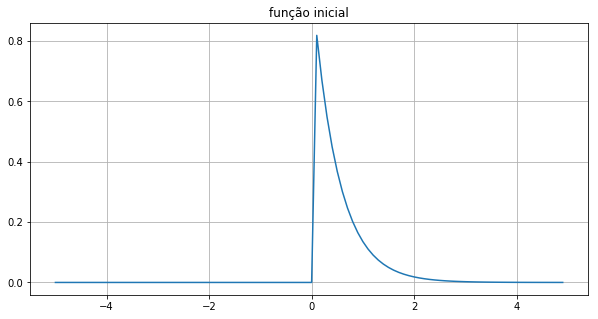

In [6]:
#construindo a função inicial 
func_ini1 = lambda t: np.exp(-a*t) * np.heaviside(t, 1)
a = 2
#exibindo o sinal
plt.figure(figsize=(10, 5))
plt.title("função inicial")
plt.plot(t, func_ini1(t))
plt.grid(True)

- Diagrama de Módulo:


 $$ |X(j\omega)| = \frac{1}{\sqrt{a^{2}+\omega^{2}}} $$


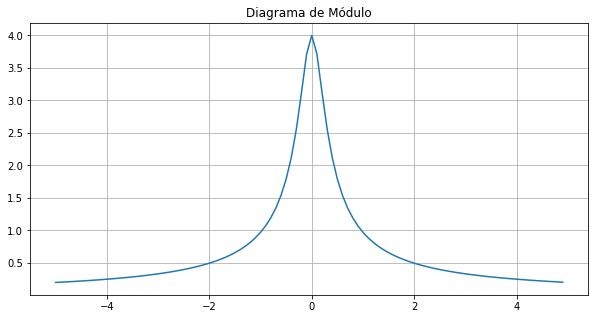

In [7]:
#construindo a fução diagrama de módulo
a = 0.25
mod_diagram1 = lambda w: 1 / np.sqrt(a**2 + w**2)
#exibindo o sinal
plt.figure(figsize=(10, 5))
plt.plot(f, mod_diagram1(t))
plt.title("Diagrama de Módulo")
plt.grid(True)

- Diagrama de Fase:
$$ ∠X(j\omega) = - arctg\frac{\omega}{a} $$

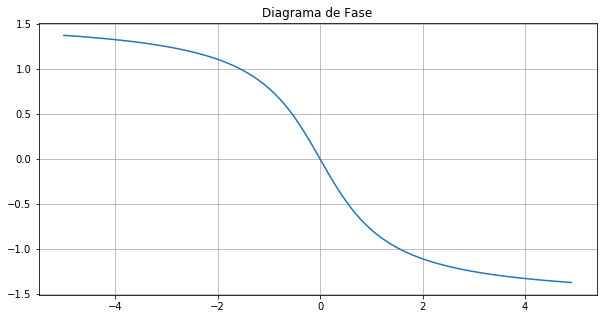

In [53]:
#construindo o diagrama de fase
a=1
fase_diagram1 = lambda w: np.arctan(w/a)
#exibindo o sinal
plt.figure(figsize=(10, 5))
plt.title("Diagrama de Fase")
plt.plot(f, -fase_diagram1(t))
plt.grid(True)

- Série de Fourier
$$ X(j\omega) = \frac{1}{(a + j\omega)}, a > 0 $$

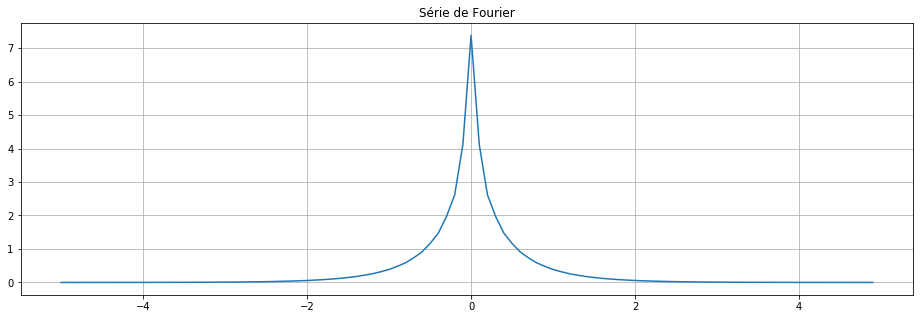

In [29]:
a = 0.25
plt.figure(figsize=(16, 5))
plt.title("Série de Fourier")
plt.plot(f, ft(mod_diagram1(t), Fs, t0).real)
plt.grid(True)

<br>[⬆ volte ao topo](#Conteúdo)

### Exemplo_8.2

- função Inicial:
    $$ x(t) = e^{-a|t|} ,      a > 0 $$


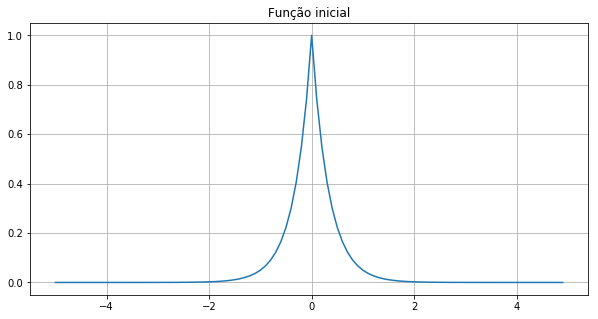

In [55]:
#Construindo a função inicial 
func_ini2= lambda t: np.exp(-a*np.abs(t))
#Exibindo a função inicial
a = 3
plt.figure(figsize=(10, 5))
plt.title("Função inicial")
plt.plot(t, func_ini2(t))
plt.grid(True)

- O diagrama de Módulo é dado por:

 $$ |X(j\omega)| = \frac{2a}{|(a^{2}-\omega^{2})|} $$

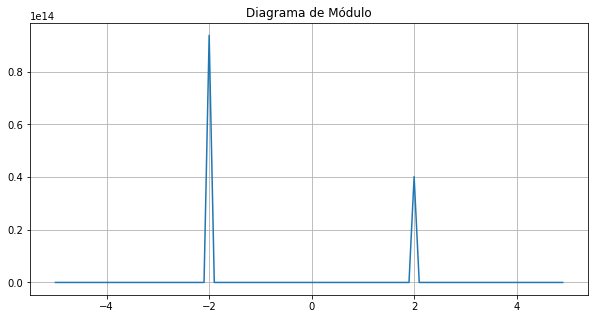

In [40]:
# Construiindo a função diagrama de módulo
mod_diagram2 = lambda w: (2*a) / np.abs((a**2 - w**2))
#Exibindo o diagrama de módulo
a=2
plt.figure(figsize=(10, 5))
plt.plot(f, mod_diagram2(t))
plt.title("Diagrama de Módulo")
plt.grid(True)


- O diagrama de fase é dado por:
    $$ ∠X(j\omega) = \bigg\{ \begin{matrix} 0,  \mbox{  se  }-a < \omega < a \\ -\pi,  \mbox{ se }\omega < -a \mbox{ ou } \omega > a \end{matrix} $$ 

- A transformada de Fourier é dada por:

$$ X(j\omega) = \frac{2a}{(a^{2} + \omega^{2})}$$

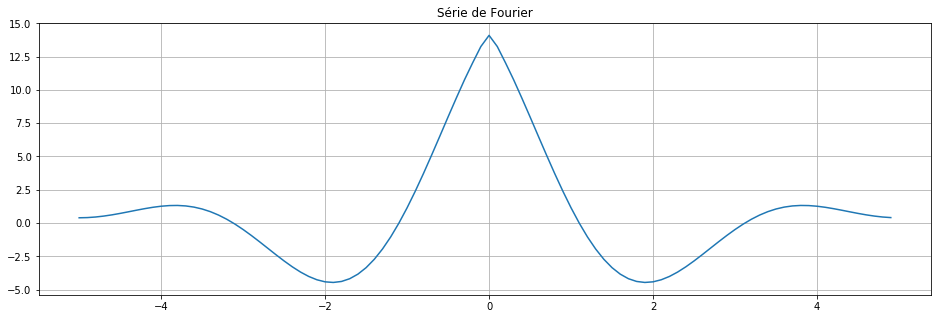

In [49]:
#Exibindo a série de Fourier
plt.figure(figsize=(16, 5))
plt.title("Série de Fourier")
plt.plot(f, ft(mod_diagram2(t), Fs, t0).real)
plt.grid(True)

<br>[⬆ volte ao topo](#Conteúdo)

### Exemplo_8.3

- A função inicial é dada por:
$$ x(t) = \bigg\{ \begin{matrix} 1, \text{se} |t| < a \\ 0, \text{se} |t| > a \end{matrix} $$ 

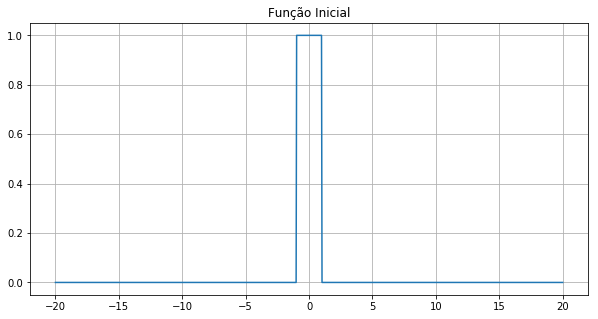

In [120]:

def func_ini3(t): 
    a = 1
    return 1*(np.abs(t) < a)

plt.figure(figsize=(10, 5))
plt.title("Função Inicial")
plt.plot(t, func_ini3(t))
plt.grid(True)



- O diagrama de módulo é dado por:
  

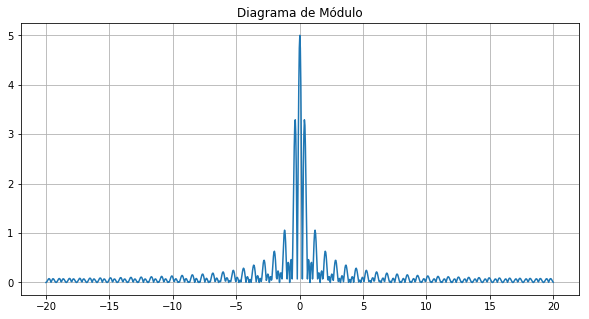

In [121]:
plt.figure(figsize=(10, 5))
plt.title("Diagrama de Módulo")
plt.plot(t, np.abs(ft(func_ini3(t), Fs, t0).real))
plt.grid(True)

- A transformada de Fourier é dada por: 
     $$ X(j\omega) = \frac{2 \text{ sen } (a\omega)}{\omega}$$
    

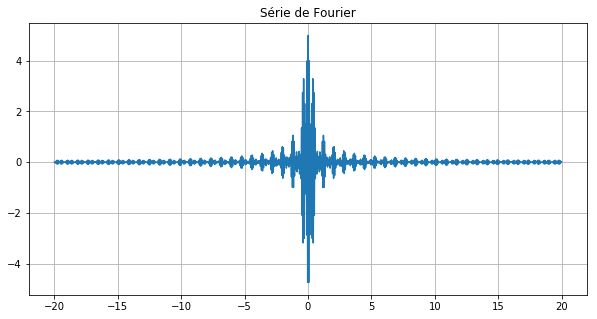

In [122]:
plt.figure(figsize=(10, 5))
plt.grid(True)
plt.title("Série de Fourier")
plt.plot(t, ft(func_ini3(t), Fs, t0).real)
plt.grid(True)

<br>[⬆ volte ao topo](#Conteúdo)

### Exemplo_8.4

- A função inicial é dada por 
$$ x(t) = sen(\omega_{0}t)$$

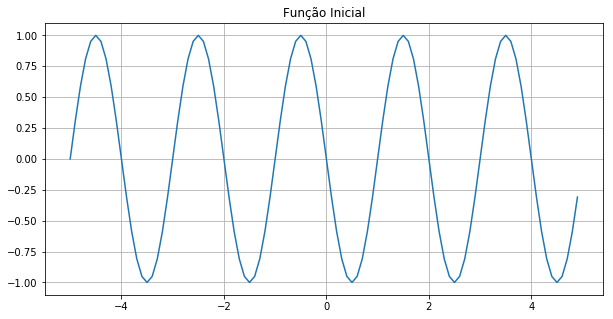

In [19]:
#construindo a função inicial
func_ini4 = lambda t: np.sin(-np.pi*t)

# exibindo a função inicial
plt.figure(figsize=(10, 5))
plt.title("Função Inicial")
plt.plot(t, func_ini4(t))
plt.grid(True)


- a transformada de Fourier é dada por:
    $$ X(j\omega) = \frac{\pi}{j}\cdot u_0(\omega - \omega_0) - \frac{\pi}{j}\cdot u_0 (\omega + \omega_0) $$

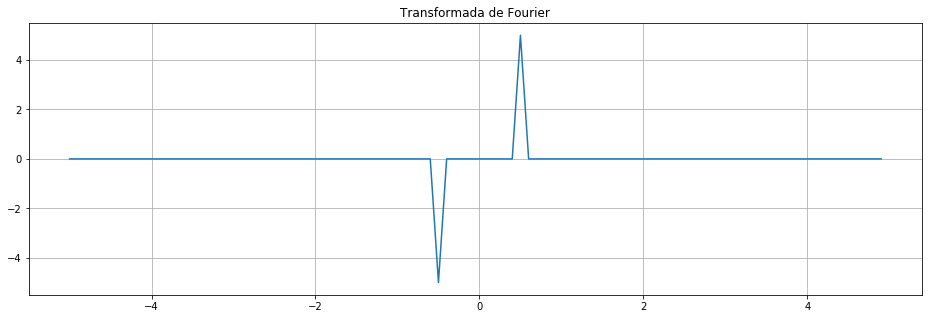

In [18]:
# Exibindo a transformada de Fourier
plt.figure(figsize=(16, 5))
plt.title("Transformada de Fourier")
plt.plot(f, ft(func_ini4(t), Fs, t0).imag)
plt.grid(True)

<br>[⬆ volte ao topo](#Conteúdo)

### Exemplo_8.5

- a função inicial é dada pela função periodica: $$ x(t) = cos(\omega_{0}t)$$

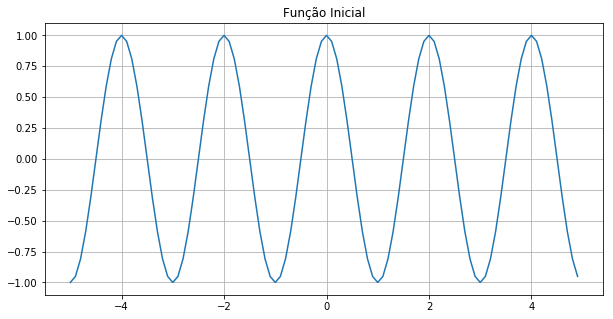

In [5]:
#Construindo a função inicial
func_ini5 = lambda t: np.cos(np.pi*t)

#Exibindo a função inicial
plt.figure(figsize=(10, 5))
plt.title("Função Inicial")
plt.plot(t, func_ini5(t))
plt.grid(True)


- A tranformada de Fourier é:

$$ X(j\omega) = {\pi}\cdot u_0(\omega + \omega_0) + {\pi}\cdot u_0 (\omega - \omega_0) $$

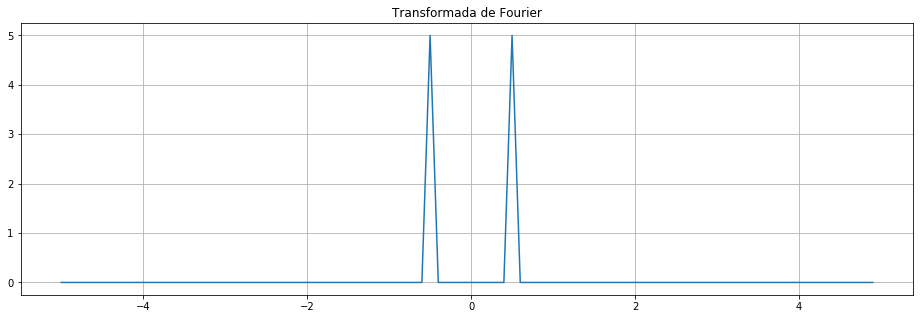

In [6]:
# Exibindo a transformada de Fourier
plt.figure(figsize=(16, 5))
plt.title("Transformada de Fourier")
plt.plot(f, ft(func_ini5(t), Fs, t0).real)
plt.grid(True)

<br>[⬆ volte ao topo](#Conteúdo)

### Exemplo_8.6

- A função inicial é dada por:
$$ x(t) = \bigg\{ \begin{matrix} 1, \text{se}, -1 < t < 0 \\ 1, \text{se},  0 < t < 1\end{matrix} $$

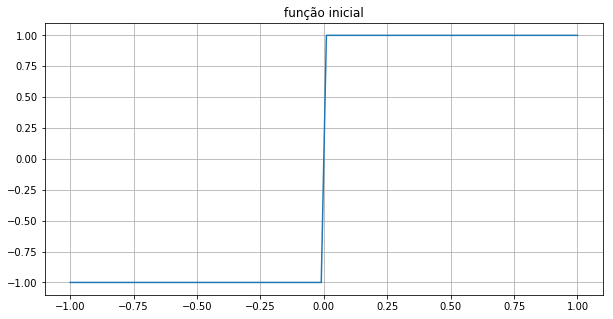

In [15]:
#Construindo a função
tempo = np.linspace(-1, 1, 100)
def func_ini5(t):
    v = []
    for i in t:
        if(-10 <= i <= 0):
            v.append(-1)
        elif(0 < i <= 10):
            v.append(1)
    
    return v

# exibindo a função inicial
plt.figure(figsize=(10, 5))
plt.title("função inicial")
plt.plot(tempo, func_ini5(tempo))
plt.grid(True)


- O diagrama de fase é dado por uma função quadrada

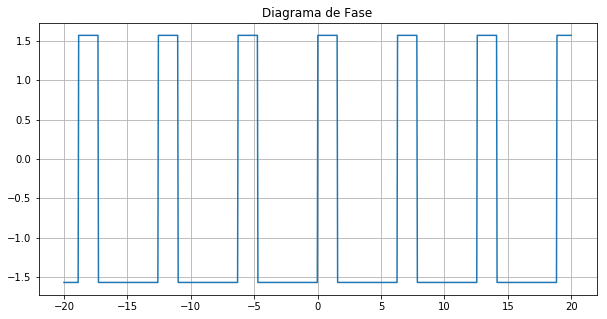

In [27]:
#construindo a função
t = np.linspace(-20, 20, 1000)
y = ss.square(t, duty= 0.25)
fase_diagram5 = [-np.pi/2 if i <= 0 else np.pi/2 for i in y]

#exibindo o diagrama de fase
plt.figure(figsize=(10, 5))
plt.plot(t, fase_diagram5)
plt.title("Diagrama de Fase")
plt.grid(True)



- O diagrama de módulo é dado por:

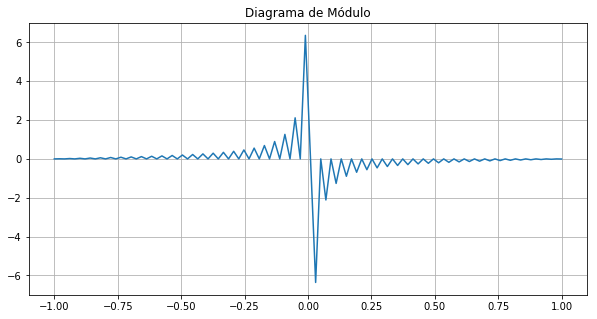

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(tempo, ft(func_ini5(tempo), Fs, t0).imag)
plt.title("Diagrama de Módulo")
plt.grid(True)

- A transformada de Fourier é dado por:

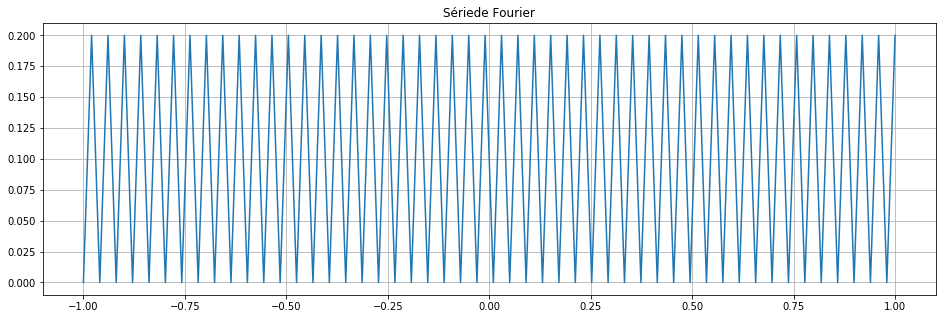

In [30]:
plt.figure(figsize=(16, 5))
plt.title("Sériede Fourier")
plt.plot(tempo, ft(func_ini5(tempo), Fs, t0).real)
plt.grid(True)

<br>[⬆ volte ao topo](#Conteúdo)

### Exemplo_8.7

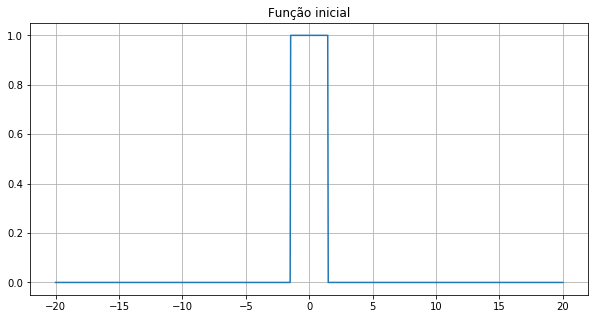

In [51]:
#construindo a função inicial
def func_ini7(t): 
    a = 1.5
    return 1*(np.abs(t) < a)

#exibindo a função 
plt.figure(figsize=(10, 5))
plt.title("Função inicial")
plt.plot(t, func_ini7(t))
plt.grid(True)



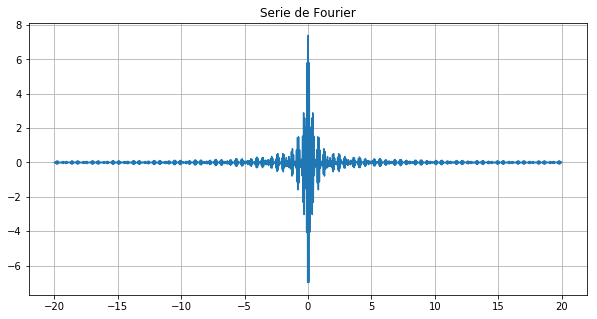

In [64]:
plt.figure(figsize=(10, 5))
plt.title("Serie de Fourier")
plt.plot(t, ft(func_ini7(t), Fs, t0).real)
plt.grid(True)

<br>[⬆ volte ao topo](#Conteúdo)

### Exemplo_8.8

Utilizaremos as seguintes funções:
    
   - $X_1(jw)= {sen{w \over 2}\over w} e \\ X_2(jw)= {sen{w \over 2}\over w}$

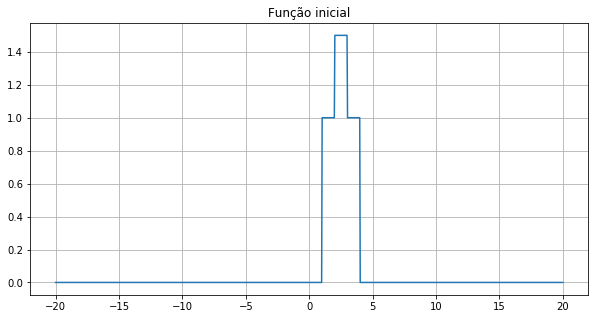

In [58]:
#construindo a função
func_ini8 = lambda t: np.heaviside(t-1, 1) + (0.5*np.heaviside(t-2, 1) - 0.5*np.heaviside(t-3, 1)) - np.heaviside(t-4, 1)

#exibindo a função inicial
plt.figure(figsize=(10, 5))
plt.title("Função inicial")
plt.plot(t, func_ini8(t))
plt.grid(True)

- a transformada de Fourier será:

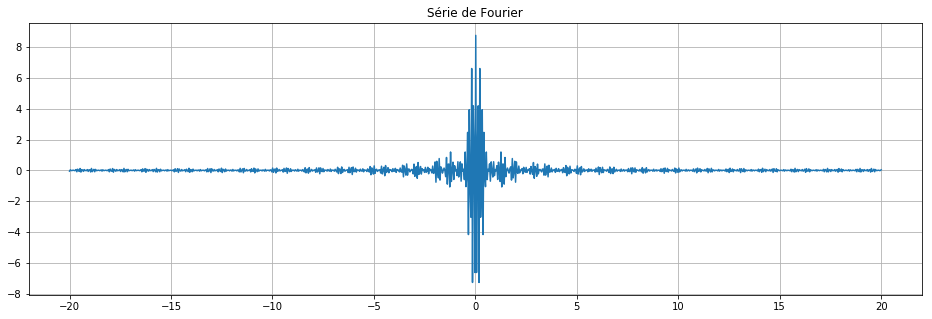

In [71]:
plt.figure(figsize=(16, 5))
plt.title("Série de Fourier")
plt.plot(t, ft(func_ini8(t), Fs, t0).real)
plt.grid(True)

<br>[⬆ volte ao topo](#Conteúdo)

### Exemplo_8.10

Neste exemplo utilizaremos a as propriedades da integral e da derivada, resultando na transformada de fourier dada por: 
     $Y(jw) = -w².X(jw)$
    

<br>[⬆ volte ao topo](#Conteúdo)

### Exemplo_8.11

de acordo com o material podemos constatar,

- $F{{{\int_\inf^{t} x \tau d \tau = {1 \over jw}F{x(t)} + \pi X(0)u_0(w)}}}$

 a transformada de Fourier sera dada por 1. Dessa forma o grpáfico deve resultar em uma reta constante

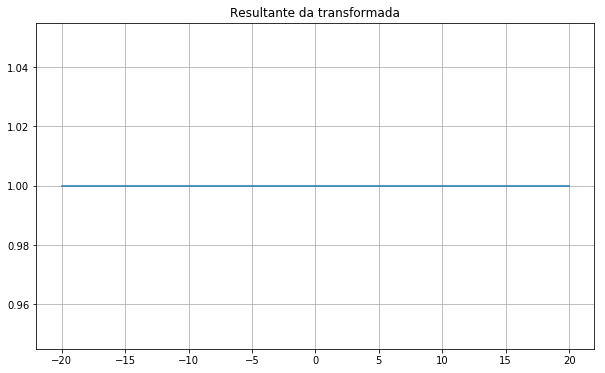

In [127]:
#construindo a função inicial
func_ini11 = lambda t: np.exp(-j*w*t)

w = 0
j = 0
plt.figure(figsize=(10, 6))


plt.title("Resultante da transformada")
plt.plot(t, func_original8(t))
plt.grid(True)


<br>[⬆ volte ao topo](#Conteúdo)

### Exemplo_8.12

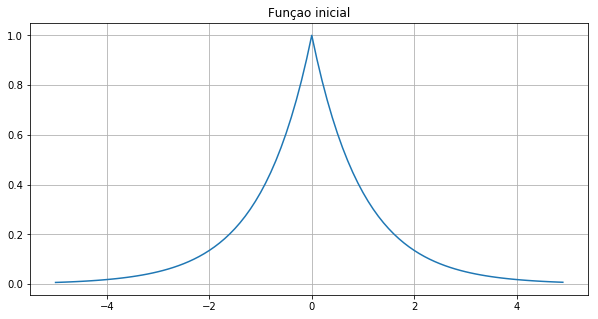

In [82]:
#Construindo a função inicial
func_ini12 = lambda t: np.exp(-np.abs(t))

#Exibindo a função 
plt.figure(figsize=(10, 5))
plt.title("Funçao inicial")
plt.plot(t, func_ini12(t))
plt.grid(True)



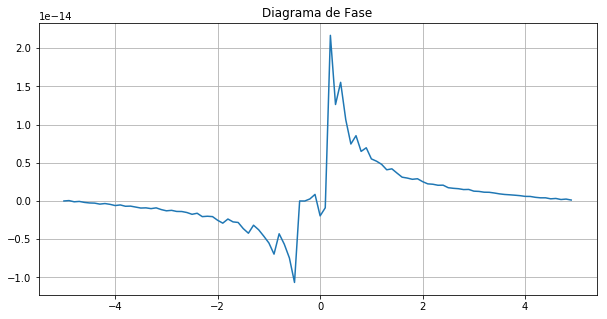

In [91]:
# Exibindo o diagrama de fase
plt.figure(figsize=(10, 5))
plt.title("Diagrama de Fase")
plt.plot(f, ft(-func_ini12(t), Fs, t0).imag)
plt.grid(True)

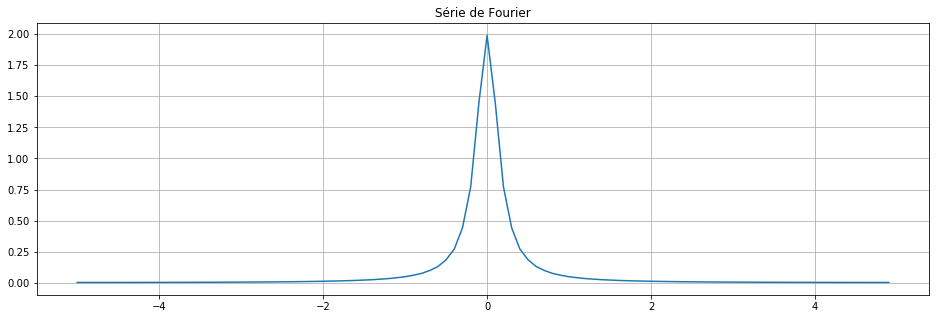

In [92]:
# Exibindo a série de Fourier
plt.figure(figsize=(16, 5))
plt.title("Série de Fourier")
plt.plot(f, ft(func_ini12(t), Fs, t0).real)
plt.grid(True)

<br>[⬆ volte ao topo](#Conteúdo)

### Exemplo_8.13

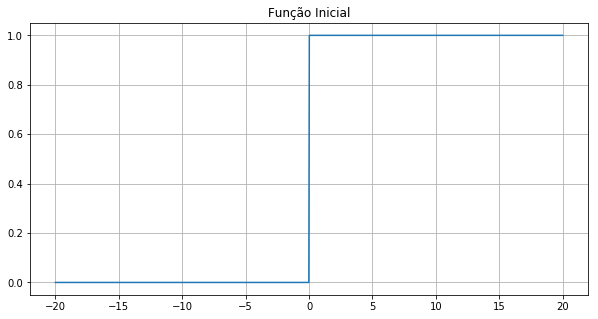

In [42]:

# Construindo a função iniciaç
func_ini13 = lambda t: np.heaviside(t , 1)

#Exibindo a função
plt.figure(figsize=(10, 5))
plt.title("Função Inicial")
plt.plot(t, func_ini13(t))
plt.grid(True)

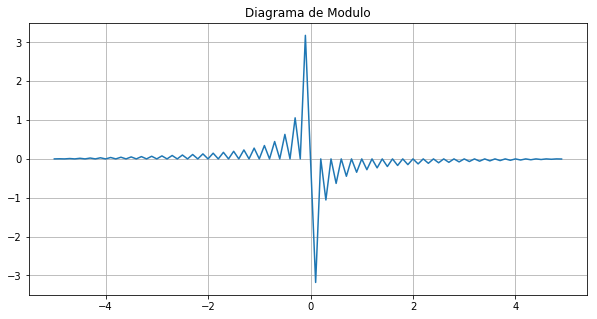

In [50]:
plt.figure(figsize=(10, 5))
plt.title("Diagrama de Modulo")
plt.plot(f, ft(func_ini13(tempo), Fs, t0).imag)
plt.grid(True)

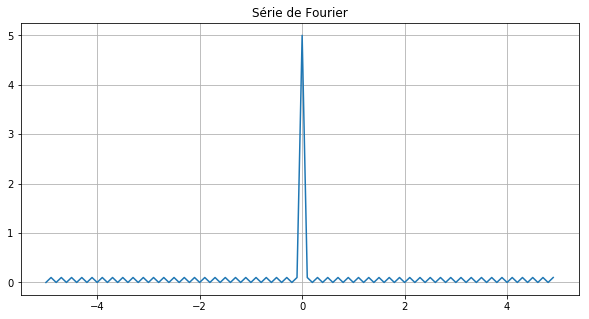

In [51]:
plt.figure(figsize=(10, 5))
plt.title("Série de Fourier")
plt.plot(f, ft(func_ini13(tempo), Fs, t0).real)
plt.grid(True)

### Exemplo_8.14

Utilizando as propriedades vistas no material e fazendo transformad de fourier temos:
     $$Y(jw) = F{y(t)} = jw.X(jw)$$ e assim
        $$H(jw) = jw$$

### Exemplo_8.15

 $Y(jw) = H(jw)X(jw) = {1 \over jw}X(jw) + \pi X(0).u_0(w) $ 

### Exemplo_8.16

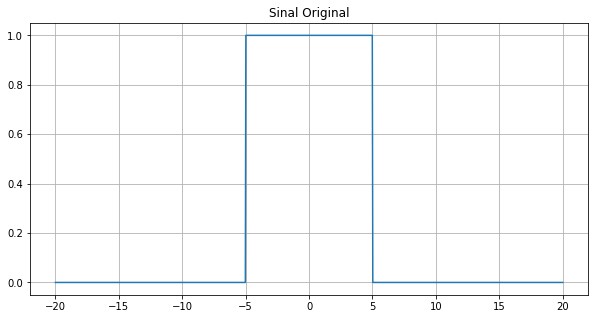

In [60]:
func_ini16 = lambda w: 1 * np.abs(w) < wx
wx = 5

plt.figure(figsize=(10, 5))
plt.title("Sinal Original")
plt.plot(t, func_ini16(t))
plt.grid(True)

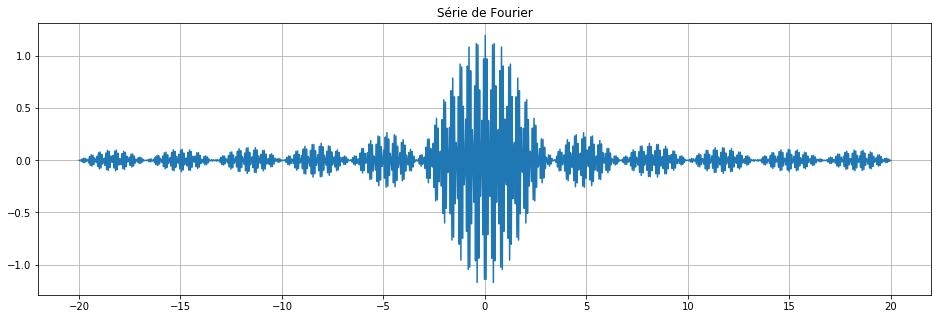

In [61]:
wx=0.25
plt.figure(figsize=(16, 5))
plt.title("Série de Fourier")
plt.plot(t, ft(func_ini16(t), Fs, t0).real)
plt.grid(True)

<br>[⬆ volte ao topo](#Conteúdo)